In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

init_notebook_mode(connected=True)
cf.go_offline()



In [3]:

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

In [4]:
os.getcwd()

'C:\\Users\\dell\\Dropbox\\My PC (DESKTOP-ECH9SOI)\\Desktop\\SIH'

In [5]:
data = pd.read_csv("trialdata for job title.csv")

In [6]:
data.head()

,Title,Location,Company,Salary,Sponsored,Description,Unnamed: 6
0,Research Analyst,None,CloudTech NxtGen,"₹10,000 - ₹50,000 a month",Organic,responsibility understanding analyzing company...,NaN
1,Research Analyst,"Bengaluru, Karnataka",Aegis Meridian Equity Research,None,Organic,aegis meridian equity research based bangalore...,NaN
2,Research Analyst,"Bengaluru, Karnataka","Center for Study of Science, Technology and Po...","₹40,000 - ₹50,000 a month",Organic,perform primary secondary collection analysis ...,NaN
3,Research Analyst,"Pune, Maharashtra",Talkd Pvt Ltd,None,Organic,primarily responsible aggregating manually lev...,NaN
4,Research and Development Analyst,"Noida, Uttar Pradesh",Surajya Services Pvt. Ltd. (EasyGov - A Relian...,"₹2,00,000 - ₹3,00,000 a year",Organic,1testing configured scheme service 2 analysis ...,NaN


In [7]:
data["Title"].unique()

array(['Research Analyst ', 'Research Analyst',
       'Research and Development Analyst', 'Financial Analyst India',
       'DevOps Engineer', 'Data Scientist', 'Machine Learning Engineer',
       'Cloud Engineer', 'Full Stack Developer', 'Web Developer',
       'Software Developer', 'Support Administrator', 'Programmer',
       'App developer'], dtype=object)

In [8]:
data.columns

Index(['Title', 'Location', 'Company', 'Salary', 'Sponsored', 'Description',
       'Unnamed: 6'],
      dtype='object')

In [9]:
data = data.drop("Unnamed: 6", axis = 1)

In [10]:
data.head()

,Title,Location,Company,Salary,Sponsored,Description
0,Research Analyst,None,CloudTech NxtGen,"₹10,000 - ₹50,000 a month",Organic,responsibility understanding analyzing company...
1,Research Analyst,"Bengaluru, Karnataka",Aegis Meridian Equity Research,None,Organic,aegis meridian equity research based bangalore...
2,Research Analyst,"Bengaluru, Karnataka","Center for Study of Science, Technology and Po...","₹40,000 - ₹50,000 a month",Organic,perform primary secondary collection analysis ...
3,Research Analyst,"Pune, Maharashtra",Talkd Pvt Ltd,None,Organic,primarily responsible aggregating manually lev...
4,Research and Development Analyst,"Noida, Uttar Pradesh",Surajya Services Pvt. Ltd. (EasyGov - A Relian...,"₹2,00,000 - ₹3,00,000 a year",Organic,1testing configured scheme service 2 analysis ...


In [11]:
dataset = data[["Title","Description"]]

In [12]:
dataset.head()

,Title,Description
0,Research Analyst,responsibility understanding analyzing company...
1,Research Analyst,aegis meridian equity research based bangalore...
2,Research Analyst,perform primary secondary collection analysis ...
3,Research Analyst,primarily responsible aggregating manually lev...
4,Research and Development Analyst,1testing configured scheme service 2 analysis ...


In [13]:
dataset.shape

(1030, 2)

In [14]:
dataset.replace(to_replace = "Research Analyst ", value = "Research Analyst", inplace=True)

In [131]:
temp1 = dataset["Title"].unique().tolist()
temp1

['Research Analyst',
 'Research and Development Analyst',
 'Financial Analyst India',
 'DevOps Engineer',
 'Data Scientist',
 'Machine Learning Engineer',
 'Cloud Engineer',
 'Full Stack Developer',
 'Web Developer',
 'Software Developer',
 'Support Administrator',
 'Programmer',
 'App developer']

In [132]:
temp1.sort()
labels = temp1
labels

['App developer',
 'Cloud Engineer',
 'Data Scientist',
 'DevOps Engineer',
 'Financial Analyst India',
 'Full Stack Developer',
 'Machine Learning Engineer',
 'Programmer',
 'Research Analyst',
 'Research and Development Analyst',
 'Software Developer',
 'Support Administrator',
 'Web Developer']

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1030 non-null   object
 1   Description  1030 non-null   object
dtypes: object(2)
memory usage: 16.2+ KB


In [17]:
dataset.Title.value_counts()

Full Stack Developer                117
Software Developer                  111
Web Developer                       109
App developer                       102
Support Administrator               102
Data Scientist                      101
Research Analyst                     92
Machine Learning Engineer            84
Programmer                           81
DevOps Engineer                      67
Cloud Engineer                       62
Research and Development Analyst      1
Financial Analyst India               1
Name: Title, dtype: int64

In [133]:
dataset['Title'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of People', 
                                                                title='Number of people in each job role')

In [134]:
def print_plot(index):
    example = dataset[dataset.index == index][['Description', 'Title']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Title:', example[1])
print_plot(10)

research analyst post graduate agricultural economics agribusiness management writing involves research analysis commodity market spot future domestic tracking commodity preparing daily news commentary tracking domestic economic development analysing impact commodity market preparation brief research analytical special report visiting market conducting survey fresher 2yrs relevant package per industry norm interested candidate resume detail careerscommoditiescontrolcom
Title: Research Analyst


In [135]:
print_plot(100)

24 yr jaipur jaipur ctcbudget upto 14 lpa technology devops additional information skill required technical technical experienceknowledge needed cloud hosted service proven cloudbased manage maintain cloud infrastructure aws must strong technology docker kubernetes function etc knowledge orchestration tool ansible elk stack strong knowledge micro service container based architecture corresponding deployment tool technique handson knowledge implementing multistaged ci cd tool like jenkins bigbucket sound knowledge tool like kibana kafka grafana instana proficient bash scripting language must indepth knowledge clustering load balancing high availability disaster recovery auto scaling etc skill required command english purpose communicating client outside india strong independently complex issue collaborate efficiently internal expert resolve customer issue objection night shift production support work 247 basis hence rotational shift assigned candidate weekly basis everyone get equal day

In [136]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 300
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(dataset['Description'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 11537 unique tokens.


In [137]:
X = tokenizer.texts_to_sequences(dataset['Description'].values)
X = sequence.pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1030, 300)


In [138]:
Y = pd.get_dummies(dataset['Title']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (1030, 13)


In [139]:
print(labels[np.argmax(Y[200])])

Data Scientist


In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(927, 300) (927, 13)
(103, 300) (103, 13)


In [141]:
from keras.models import Sequential

In [142]:
from keras.layers import SpatialDropout1D

In [143]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 30
batch_size = 50

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 834 samples, validate on 93 samples
Epoch 1/30
834/834 [==============================] - 7s 9ms/step - loss: 2.5438 - accuracy: 0.0983 - val_loss: 2.4537 - val_accuracy: 0.1398
Epoch 2/30
834/834 [==============================] - 12s 14ms/step - loss: 2.4055 - accuracy: 0.1403 - val_loss: 2.3437 - val_accuracy: 0.1075
Epoch 3/30
834/834 [==============================] - 16s 19ms/step - loss: 2.2983 - accuracy: 0.2098 - val_loss: 2.2654 - val_accuracy: 0.1935
Epoch 4/30
834/834 [==============================] - 16s 19ms/step - loss: 2.1734 - accuracy: 0.2638 - val_loss: 2.1345 - val_accuracy: 0.1720
Epoch 5/30
834/834 [==============================] - 16s 19ms/step - loss: 2.0045 - accuracy: 0.2974 - val_loss: 1.9681 - val_accuracy: 0.2688
Epoch 6/30
834/834 [==============================] - 16s 19ms/step - loss: 1.7812 - accuracy: 0.3741 - val_loss: 1.8932 - val_accuracy: 0.3226
Epoch 7/30
834/834 [==============================] - 16s 19ms/step - loss: 1.6108 - accuracy

In [144]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

103/103 [==============================] - 0s 4ms/step
Test set
  Loss: 1.461
  Accuracy: 0.573


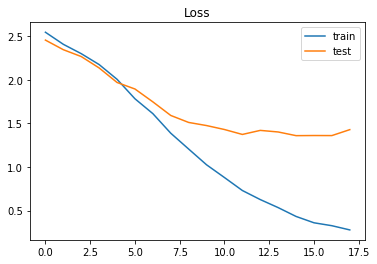

In [145]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

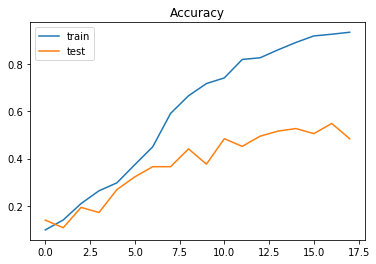

In [146]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [147]:
print_plot(200)

summary black veatch generalist scientist help develop sophisticated statistical predictive analytics solution strategically partner consumer across business area leadership production ready science solution scientist leverage broad technology azure aws databricks r spss domain specific tool like nlp computer vision lifelong learner reporting access expert scientist guidance leadership gather refine requirement business user professional requirement build science solution like predictive model responsible performance tuning model production launch monitor model performance production know redeploy model production optimization know cutting edge quantitative qualitative research method statistical analysis methodology key responsibility continual improvement efficiency effectiveness around science analytics storytelling model optimization efficient science solution industry best practice search opportunity developed science asset reused across different business unit know connect differ

In [148]:
new_role = ['summary black veatch generalist scientist help develop sophisticated statistical predictive analytics solution strategically partner consumer across business area leadership production ready science solution scientist leverage broad technology azure aws databricks r spss domain specific tool like nlp computer vision lifelong learner reporting access expert scientist guidance leadership gather refine requirement business user professional requirement build science solution like predictive model responsible performance tuning model production launch monitor model performance production know redeploy model production optimization know cutting edge quantitative qualitative research method statistical analysis methodology key responsibility continual improvement efficiency effectiveness around science analytics storytelling model optimization efficient science solution industry best practice search opportunity developed science asset reused across different business unit know connect different source like database server sharepoint flat file like excel csv streamline optimize model leverage powerapps form solicit collect user application know scrub manipulate produce white paperresearch article documentation outlining deliverable help design governance framework companywide governance coordinate director technical manager oversee strategic technology roadmaps align delivering business roadmaps help design guideline principle rest us science solution preferred qualification phd degree mathematics statistic computer science econometrics science prior structured unstructured analytical able perform independent evaluation selection application bi standard technique procedure able articulate user design principle member user strong interpersonal presentation written facilitation organizational facilitate productive working able prioritize multiple project time qualification bachelorsmaster degree computer science science statistic analytics mathematics business intelligence fouryear academic institution total 10 year able develop consult business unit deliver bi solution 812 year previous 5 year scientist expert proficiency sql python r spss sa mandatory azure aws databricks technical proficiency scripting language certification preferred microsoft certified bi reporting environmentphysical demand competency resourcefulness plan information technology grade 006']
seq = tokenizer.texts_to_sequences(new_role)
padded = sequence.pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
predictions(pred)

[[7.3810421e-05 3.4379764e-03 9.6925062e-01 2.9337145e-03 2.5914481e-04
  7.4670505e-05 1.8851496e-02 2.6818505e-04 2.8202198e-03 9.5675139e-05
  1.9990069e-04 6.0602778e-04 1.1285426e-03]] Data Scientist


In [149]:
labels

['App developer',
 'Cloud Engineer',
 'Data Scientist',
 'DevOps Engineer',
 'Financial Analyst India',
 'Full Stack Developer',
 'Machine Learning Engineer',
 'Programmer',
 'Research Analyst',
 'Research and Development Analyst',
 'Software Developer',
 'Support Administrator',
 'Web Developer']

In [150]:
predictions_list = []
def predictions(pred):
    pred_reshape = np.reshape(pred, (13,1))
    list_pred = pred_reshape.tolist()
    [list_pred[i].append(i+1) for i in range(0,len(list_pred))]
    list_pred.sort(key = lambda x: x[0], reverse = True )
    for i in range(0,len(list_pred)):
        predictions_list.append(labels[list_pred[i][1] - 1])
    return predictions_list

final_predictions = predictions(pred)
pd.Series(final_predictions).head()

0               Data Scientist
1    Machine Learning Engineer
2               Cloud Engineer
3              DevOps Engineer
4             Research Analyst
dtype: object